# DATA PREPROCESSING

## Load libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
from apyori import apriori

## Import data

### Main dataset

In [2]:
# main dataset
laundry = pd.read_csv('LaundryData.csv') 
laundry.columns = map(str.upper, laundry.columns)
laundry.head()

,NO,DATE,TIME,RACE,GENDER,BODY_SIZE,AGE_RANGE,WITH_KIDS,KIDS_CATEGORY,BASKET_SIZE,BASKET_COLOUR,ATTIRE,SHIRT_COLOUR,SHIRT_TYPE,PANTS_COLOUR,PANTS_TYPE,WASH_ITEM,WASHER_NO,DRYER_NO,SPECTACLES
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


### Additional dataset

In [3]:
# import additional dataset: Taman perumahan by state = kel, n9,phg, prk
residentsKelantan = pd.read_excel('TamanPerumahan/KELANTAN.xlsx', skiprows=3)
residentsKelantan = residentsKelantan.iloc[:563,:]
display(residentsKelantan.head())
residentsPerak = pd.read_excel('TamanPerumahan/PENGKALANHULU.xlsx', skiprows=3)
residentsPerak = residentsPerak.iloc[:23,:]
display(residentsPerak.head())
residentsPahang = pd.read_excel('TamanPerumahan/PAHANG.xlsx', skiprows=2)
residentsPahang = residentsPahang.iloc[:40,:]
display(residentsPahang.head())
residentsN9 = pd.read_csv('TamanPerumahan/NEGERISEMBILAN.csv', encoding='cp1252')
display(residentsN9.head())

,JAJAHAN,PBT,NAMA PERUMAHAN,LATITUDE,LONGITUDE,BIL RUMAH (UNIT)
0,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Mesra,4.875802,101.962055,193.0
1,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Wangsa Mewangi,4.872028,101.964018,231.0
2,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Bandar Baru,4.863622,101.959529,65.0
3,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Wisma Sri Galas,4.86336,101.961087,89.0
4,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Titiwangsa,4.862772,101.954591,252.0


,BIL,NAMA TAMAN,KATEGORI RUMAH,BILANGAN UNIT,JENIS RUMAH
0,1.0,Taman Sentosa (RPA 1),Rendah,50,Teres Setingkat
1,2.0,Taman Damai (RPA 2),Rendah,40,Teres Setingkat
2,3.0,Taman Aman (RPA 3),Rendah,96,Teres Setingkat
3,4.0,Taman Bersatu,Sederhana,35,Teres Setingkat
4,5.0,Taman Mawar,Rendah,26,Teres Setingkat


,NO,NAMA TAMAN,MUKIM,POSKOD,BILANGAN RUMAH
0,1.0,Taman Maran Impian,MARAN,26500.0,141
1,2.0,Taman Sri Chedong,MARAN,26500.0,111
2,3.0,Taman Maran Jaya,MARAN,26500.0,298
3,4.0,Taman Sri Keramat,MARAN,26500.0,184
4,5.0,Taman Berkat Mutiara,MARAN,26500.0,36


,Bil,Nama Taman,Daerah,Mukim,Poskod,Bilangan Rumah
0,1,TAMAN SHUKOR,Seremban,AMPANGAN,70400,43
1,2,TAMAN DESA KENANGA INDAH,Seremban,AMPANGAN,70400,30
2,3,TAMAN VILLA PALMA,Seremban,AMPANGAN,70400,56
3,4,TAMAN SERI SENTOSA,Seremban,AMPANGAN,70400,28
4,5,RESIDENSI SIGC,Seremban,AMPANGAN,70400,217


In [4]:
residentsN9.iloc[:23,:]

,Bil,Nama Taman,Daerah,Mukim,Poskod,Bilangan Rumah
0,1,TAMAN SHUKOR,Seremban,AMPANGAN,70400,43
1,2,TAMAN DESA KENANGA INDAH,Seremban,AMPANGAN,70400,30
2,3,TAMAN VILLA PALMA,Seremban,AMPANGAN,70400,56
3,4,TAMAN SERI SENTOSA,Seremban,AMPANGAN,70400,28
4,5,RESIDENSI SIGC,Seremban,AMPANGAN,70400,217
5,6,GEDUNG LALANG 162,Seremban,AMPANGAN,70400,198
6,7,GEDUNG LALANG 50,Seremban,AMPANGAN,70400,171
7,8,TAMAN DATO WAN,Seremban,AMPANGAN,70400,120
8,9,TAMAN GOLF HEIGHT,Seremban,AMPANGAN,70400,91
9,10,TAMAN SIKAMAT ACASIA COUNTRY HEIGHT,Seremban,AMPANGAN,70400,283


## Preprocessing main dataset

### Get overview of data

In [5]:
laundry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             807 non-null    int64  
 1   DATE           807 non-null    object 
 2   TIME           807 non-null    object 
 3   RACE           797 non-null    object 
 4   GENDER         793 non-null    object 
 5   BODY_SIZE      790 non-null    object 
 6   AGE_RANGE      799 non-null    float64
 7   WITH_KIDS      794 non-null    object 
 8   KIDS_CATEGORY  777 non-null    object 
 9   BASKET_SIZE    801 non-null    object 
 10  BASKET_COLOUR  798 non-null    object 
 11  ATTIRE         776 non-null    object 
 12  SHIRT_COLOUR   798 non-null    object 
 13  SHIRT_TYPE     770 non-null    object 
 14  PANTS_COLOUR   802 non-null    object 
 15  PANTS_TYPE     798 non-null    object 
 16  WASH_ITEM      784 non-null    object 
 17  WASHER_NO      807 non-null    int64  
 18  DRYER_NO  

### Dealing null and duplicates data

In [6]:
# dearling wih missing values
laundry.isna().sum()

NO                0
DATE              0
TIME              0
RACE             10
GENDER           14
BODY_SIZE        17
AGE_RANGE         8
WITH_KIDS        13
KIDS_CATEGORY    30
BASKET_SIZE       6
BASKET_COLOUR     9
ATTIRE           31
SHIRT_COLOUR      9
SHIRT_TYPE       37
PANTS_COLOUR      5
PANTS_TYPE        9
WASH_ITEM        23
WASHER_NO         0
DRYER_NO          0
SPECTACLES        0
dtype: int64

In [7]:
# drop rows with null values
laundry = laundry.dropna()
laundry.shape

(642, 20)

In [8]:
# dealing with duplicates data
laundry.drop_duplicates()

,NO,DATE,TIME,RACE,GENDER,BODY_SIZE,AGE_RANGE,WITH_KIDS,KIDS_CATEGORY,BASKET_SIZE,BASKET_COLOUR,ATTIRE,SHIRT_COLOUR,SHIRT_TYPE,PANTS_COLOUR,PANTS_TYPE,WASH_ITEM,WASHER_NO,DRYER_NO,SPECTACLES
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
8,9,20/10/2015,0:45:19,indian,male,thin,30.0,no,no_kids,small,purple,casual,white,short_sleeve,black,short,clothes,6,10,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,09/12/2015,20:05:46,malay,female,moderate,45.0,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,804,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,805,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,806,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no


### Data type conversion

In [9]:
laundry['TIME'] = pd.to_datetime(laundry['TIME']).dt.time

laundry['DATE'] = pd.to_datetime(laundry['DATE'], format='%d/%m/%Y', errors='coerce')


### Add new columns

In [10]:
# Binning time into day and night 
# night = 7pm - 7am, day = 7am - 6.59pm
bins = ['19:00:00','07:00:00','18:59:59']
labels = ["Night","Day","Night"]

hours = pd.to_datetime(laundry['TIME'], format='%H:%M:%S').dt.hour
laundry['PART_OF_DAY'] = pd.cut(hours,  bins=[0,7,19,24], include_lowest=True,  labels=labels,ordered=False)
laundry['PART_OF_DAY'].head()

0    Night
1    Night
2    Night
4    Night
8    Night
Name: PART_OF_DAY, dtype: category
Categories (2, object): ['Day', 'Night']

In [11]:
# Binning date into days
days = laundry['DATE'].dt.dayofweek #gives only the index(0-monday,6-sunday)
mappingtoDays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

laundry['PART_OF_WEEK'] = days
laundry['PART_OF_WEEK'] = laundry['PART_OF_WEEK'].map(mappingtoDays)
laundry['PART_OF_WEEK'].head()

0     Monday
1     Monday
2     Monday
4     Monday
8    Tuesday
Name: PART_OF_WEEK, dtype: object

In [12]:
# Binning age into young, adult, senior citizen
laundry["AGE_CATEGORY"] = pd.cut(laundry["AGE_RANGE"], bins=[1,30,45,70], labels=["Young","Adults","Older adults"])
laundry['AGE_CATEGORY'].value_counts()

Adults          331
Older adults    248
Young            63
Name: AGE_CATEGORY, dtype: int64

### Outlier analysis


In [13]:
fig = px.box(laundry, x="GENDER", y='AGE_RANGE')
fig.show()

## Preprocessing Additional Dataset

### Check null values

In [14]:
print("Resident Negeri Sembilan:")
display(residentsN9.isna().sum())
print("Resident Pahang:")
display(residentsPahang.isna().sum())
print("Resident Perak:")
display(residentsPerak.isna().sum())
print("Resident Kelantan:")
display(residentsKelantan.isna().sum())

Resident Negeri Sembilan:


Bil               0
Nama Taman        0
Daerah            0
Mukim             0
Poskod            0
Bilangan Rumah    0
dtype: int64

Resident Pahang:


NO                0
NAMA TAMAN        0
MUKIM             0
POSKOD            0
BILANGAN RUMAH    0
dtype: int64

Resident Perak:


BIL               0
NAMA TAMAN        0
KATEGORI RUMAH    1
BILANGAN UNIT     0
JENIS RUMAH       2
dtype: int64

Resident Kelantan:


JAJAHAN             0
PBT                 0
NAMA PERUMAHAN      0
LATITUDE            0
LONGITUDE           0
BIL RUMAH (UNIT)    0
dtype: int64

### Merging dataset into one dataframe

In [15]:
# Declare dataframe for additional dataset
residentalLocation = pd.DataFrame(columns=['STATE','RESIDENTAL_AREA','DISTRICT','NUMBER_OF_HOUSES'])
residentalLocation

,STATE,RESIDENTAL_AREA,DISTRICT,NUMBER_OF_HOUSES


In [16]:
# add Negeri sembilan
for i in range(len(residentsN9)):
    residentalLocation = residentalLocation.append({'STATE': 'Negeri Sembilan', 'RESIDENTAL_AREA': residentsN9.iloc[[i]]['Nama Taman'].values[0],'DISTRICT': residentsN9.iloc[[i]]['Daerah'].values[0],'NUMBER_OF_HOUSES':residentsN9.iloc[[i]]['Bilangan Rumah'].values[0]}, ignore_index=True)

# add Kelantan
for i in range(len(residentsKelantan)):
    residentalLocation = residentalLocation.append({'STATE': 'Kelantan', 'RESIDENTAL_AREA': residentsKelantan.iloc[[i]]['NAMA PERUMAHAN'].values[0],'DISTRICT': residentsKelantan.iloc[[i]]['JAJAHAN'].values[0],'NUMBER_OF_HOUSES':residentsKelantan.iloc[[i]]['BIL RUMAH (UNIT)'].values[0]}, ignore_index=True)

# add Pahang
for i in range(len(residentsPahang)):
    residentalLocation = residentalLocation.append({'STATE': 'Pahang', 'RESIDENTAL_AREA': residentsPahang.iloc[[i]]['NAMA TAMAN'].values[0],'DISTRICT': residentsPahang.iloc[[i]]['MUKIM'].values[0],'NUMBER_OF_HOUSES':residentsPahang.iloc[[i]]['BILANGAN RUMAH'].values[0]}, ignore_index=True)

# add Perak
for i in range(len(residentsPerak)):
    residentalLocation = residentalLocation.append({'STATE': 'Perak', 'RESIDENTAL_AREA': residentsPerak.iloc[[i]]['NAMA TAMAN'].values[0],'DISTRICT': 'Pengkalan Hulu','NUMBER_OF_HOUSES':residentsPerak.iloc[[i]]['BILANGAN UNIT'].values[0]}, ignore_index=True)


### Changing Data Type

In [17]:
residentalLocation['NUMBER_OF_HOUSES'] = pd.to_numeric(residentalLocation['NUMBER_OF_HOUSES'], errors='coerce')
residentalLocation = residentalLocation.dropna()

### Outlier analysis

In [18]:
df = px.data.tips()
fig = px.box(residentalLocation, x="STATE", y="NUMBER_OF_HOUSES")
fig.show()

# Exploratory Data Analysis

In [19]:
laundryAnalaysis = laundry.copy()
residentalLocationAnalysis = residentalLocation.copy()

### 5. Frequency usage for washer and dryer per month

#### WASHER

In [20]:
temp = laundryAnalaysis.copy()
temp['WASHER_NO'] = temp['WASHER_NO'].apply(lambda x: 1)
temp['DRYER_NO'] = temp['DRYER_NO'].apply(lambda x: 1)
temp['MONTH'] = temp['DATE'].dt.month

a = temp[temp['MONTH']==11].groupby(['DATE','WASHER_NO']).size().unstack()
a.reset_index(inplace=True)
a.rename(columns={'DATE': 'DATE', 1: 'FREQUENCY'}, inplace=True)

print('Frequency of washer used per month is: ', a['FREQUENCY'].sum())
alt.Chart(a).mark_bar().encode(
    x='DATE',
    y='FREQUENCY',
)

Frequency of washer used per month is:  512


alt.Chart(...)

#### DRYER

In [21]:
b = temp[temp['MONTH']==11].groupby(['DATE','DRYER_NO']).size().unstack()
b.reset_index(inplace=True)
b.rename(columns={'DATE': 'DATE', 1: 'FREQUENCY'}, inplace=True)

print('Frequency of dryer used per month is: ', b['FREQUENCY'].sum())
alt.Chart(b).mark_bar().encode(
    x='DATE',
    y='FREQUENCY',
)

Frequency of dryer used per month is:  512


alt.Chart(...)

6. Which dryer and washing machine are frequently used together? 

In [22]:
import warnings
warnings.filterwarnings("ignore")
washerAndDryer = laundryAnalaysis[['WASHER_NO','DRYER_NO']]
washerAndDryer['WASHER_NO'] = 'WASHER ' + washerAndDryer['WASHER_NO'].astype(str)
washerAndDryer['DRYER_NO'] = 'DRYER ' + washerAndDryer['DRYER_NO'].astype(str)
display(washerAndDryer)
records = washerAndDryer.values.tolist()

,WASHER_NO,DRYER_NO
0,WASHER 3,DRYER 10
1,WASHER 6,DRYER 9
2,WASHER 4,DRYER 10
4,WASHER 3,DRYER 9
8,WASHER 6,DRYER 10
...,...,...
802,WASHER 3,DRYER 10
803,WASHER 3,DRYER 7
804,WASHER 3,DRYER 7
805,WASHER 6,DRYER 10


In [23]:
# apply apriori algorithm with support = 0.45%, confidence =20%, lift = 3.000
association_results = apriori(records, min_support=0.0045, min_confidence=0.3, min_lift=1, min_length=1)
association_results = list(association_results)
print(len(association_results))

4


In [24]:
cnt =0

dryer = []
washer = []

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + str(items[0]) + " -> " + str(items[1]))

    dryer.append(str(items[0]))
    washer.append(str(items[1]))

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) DRYER 10 -> WASHER 6
Support: 0.089
Confidence: 0.3497
Lift: 1.3524
(Rule 2) DRYER 7 -> WASHER 3
Support: 0.112
Confidence: 0.3789
Lift: 1.3294
(Rule 3) DRYER 8 -> WASHER 4
Support: 0.072
Confidence: 0.3007
Lift: 1.4089
(Rule 4) DRYER 9 -> WASHER 5
Support: 0.07
Confidence: 0.3309
Lift: 1.3617


7. What are the potential locations to open a new laundry based on the population of housing areas? 


#### Overall

In [25]:
topOverall = residentalLocationAnalysis.sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
fig = px.bar(topOverall.iloc[:10,:], x="RESIDENTAL_AREA", y="NUMBER_OF_HOUSES",title="Overall")
fig.show()


#### Kelantan

In [26]:
topKelantan = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Kelantan'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topKelantan.head(10)
fig = px.bar(topKelantan.iloc[:10,:], x="RESIDENTAL_AREA", y="NUMBER_OF_HOUSES",title="Kelantan")
fig.show()

#### Negeri Sembilan

In [27]:
topN9 = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Negeri Sembilan'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
fig = px.bar(topN9.iloc[:10,:], x="RESIDENTAL_AREA", y="NUMBER_OF_HOUSES",title="Negeri Sembilan")
fig.show()

#### Pahang

In [28]:
topPahang = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Pahang'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
fig = px.bar(topPahang.iloc[:10,:], x="RESIDENTAL_AREA", y="NUMBER_OF_HOUSES",title="Pahang")
fig.show()

#### Perak


In [29]:
topPerak = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Perak'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
fig = px.bar(topPerak.iloc[:10,:], x="RESIDENTAL_AREA", y="NUMBER_OF_HOUSES",title="Perak")
fig.show()

#### Comparison between state

In [30]:
fig = px.box(topOverall, x="STATE", y='NUMBER_OF_HOUSES')
fig.show()

### 3. What is the common attire worn by the customer (attire, shirt color, shirt type, pants color, pants type)?

## Feature Selection

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
import warnings
warnings.filterwarnings('ignore')

In [48]:
laundry.columns

Index(['NO', 'DATE', 'TIME', 'RACE', 'GENDER', 'BODY_SIZE', 'AGE_RANGE',
       'WITH_KIDS', 'KIDS_CATEGORY', 'BASKET_SIZE', 'BASKET_COLOUR', 'ATTIRE',
       'SHIRT_COLOUR', 'SHIRT_TYPE', 'PANTS_COLOUR', 'PANTS_TYPE', 'WASH_ITEM',
       'WASHER_NO', 'DRYER_NO', 'SPECTACLES', 'PART_OF_DAY', 'PART_OF_WEEK',
       'AGE_CATEGORY'],
      dtype='object')

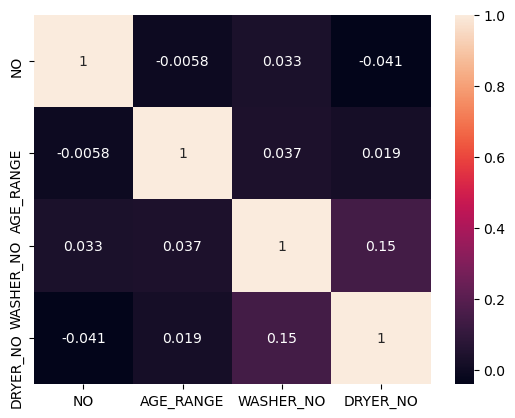

In [62]:
corrMatrix = laundry.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [67]:
laundry = laundry.drop('NO', 1)


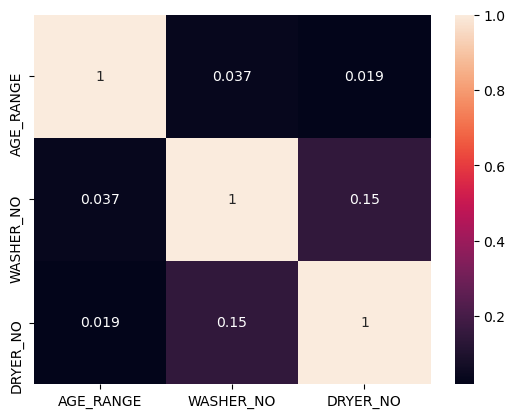

In [70]:
cor = laundry.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [72]:
laundry

,DATE,TIME,RACE,GENDER,BODY_SIZE,AGE_RANGE,WITH_KIDS,KIDS_CATEGORY,BASKET_SIZE,BASKET_COLOUR,...,SHIRT_TYPE,PANTS_COLOUR,PANTS_TYPE,WASH_ITEM,WASHER_NO,DRYER_NO,SPECTACLES,PART_OF_DAY,PART_OF_WEEK,AGE_CATEGORY
0,2015-10-19,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,Night,Monday,Young
1,2015-10-19,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,...,short_sleeve,blue_jeans,long,clothes,6,9,no,Night,Monday,Adults
2,2015-10-19,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,Night,Monday,Young
4,2015-10-19,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,Night,Monday,Adults
8,2015-10-20,00:45:19,indian,male,thin,30.0,no,no_kids,small,purple,...,short_sleeve,black,short,clothes,6,10,no,Night,Tuesday,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2015-12-09,20:05:46,malay,female,moderate,45.0,no,no_kids,small,white,...,long sleeve,black,long,clothes,3,10,no,Night,Wednesday,Adults
803,2015-12-09,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,...,short_sleeve,black,long,blankets,3,7,no,Night,Wednesday,Adults
804,2015-12-09,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,...,long sleeve,pink,long,clothes,3,7,yes,Night,Wednesday,Older adults
805,2015-12-09,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,...,short_sleeve,black,long,clothes,6,10,no,Night,Wednesday,Adults
